In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = 'False'
plt.rcParams['font.size'] = 15

In [2]:

news = pd.read_excel('combination_1.xlsx')
print(news.shape)
news.head()

(14632, 4)


,content,channelName,title,tag
0,北京3月31日电 (记者 王恩博)随着中国金融业开放程度不断加深，越来越多外资机构来华展业。...,财经,在华外资银行保险机构数量稳步增长 总资产逾5万亿元,0
1,北京3月31日电 (记者 王恩博)记者3月31日从中国银保监会获悉，官方将坚决惩治重大金融风...,财经,银保监会：坚决惩治重大金融风险背后的腐败问题,0
2,天津3月31日电 (记者 张道正)京津冀交通一体化重点项目又有新进展。31日凌晨2时40分，...,财经,京津冀交通一体化持续推进 京滨铁路单跨最长连续梁顺利合龙,0
3,中新经纬客户端3月31日电 周三，A股三大指数小幅低开，能源设备、家用电器、汽车、造纸等板块...,财经,A股三大指数小幅低开 汽车股涨幅居前,0
4,华盛顿3月30日电 (记者 沙晗汀)国际货币基金组织(IMF)总裁格奥尔基耶娃当地时间30日...,财经,IMF总裁：预计全球经济增长好于预期但不确定性高,0


In [3]:
news.isnull().sum()

content        98
channelName     0
title           0
tag             0
dtype: int64

In [4]:
news['tag']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
14602    9
14603    9
14604    9
14605    9
14606    9
14607    9
14608    9
14609    9
14610    9
14611    9
14612    9
14613    9
14614    9
14615    9
14616    9
14617    9
14618    9
14619    9
14620    9
14621    9
14622    9
14623    9
14624    9
14625    9
14626    9
14627    9
14628    9
14629    9
14630    9
14631    9
Name: tag, Length: 14632, dtype: int64

In [5]:
index = news[news['content'].isnull()].index
news['content'][index] = news['title'][index]
news.isnull().sum()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


content        0
channelName    0
title          0
tag            0
dtype: int64

In [6]:
news.loc[index].sample(5)
# 按照index索引随机取5行

,content,channelName,title,tag
10258,空军官宣“歼20七机同框” 展示自信开放心态,军事,空军官宣“歼20七机同框” 展示自信开放心态,4
2235,法国巴黎股市CAC40指数3日上涨,财经,法国巴黎股市CAC40指数3日上涨,0
4984,医美界曝惊心大丑闻 知名“瘦脸针”产品被吊销许可,财经,医美界曝惊心大丑闻 知名“瘦脸针”产品被吊销许可,0
7060,海南自贸港将允许境外理工农医类高水平大学独立办学,财经,海南自贸港将允许境外理工农医类高水平大学独立办学,0
7868,巴黎股市CAC40指数23日上涨,财经,巴黎股市CAC40指数23日上涨,0


In [7]:
print(news.duplicated().sum())
display(news[news.duplicated()])
#去除重复，显示的是重复的新闻,共有1879条重复

1879


,content,channelName,title,tag
97,北京3月31日电 (记者 王恩博)随着中国金融业开放程度不断加深，越来越多外资机构来华展业。...,财经,在华外资银行保险机构数量稳步增长 总资产逾5万亿元,0
98,北京3月31日电 (记者 王恩博)记者3月31日从中国银保监会获悉，官方将坚决惩治重大金融风...,财经,银保监会：坚决惩治重大金融风险背后的腐败问题,0
99,天津3月31日电 (记者 张道正)京津冀交通一体化重点项目又有新进展。31日凌晨2时40分，...,财经,京津冀交通一体化持续推进 京滨铁路单跨最长连续梁顺利合龙,0
100,中新经纬客户端3月31日电 周三，A股三大指数小幅低开，能源设备、家用电器、汽车、造纸等板块...,财经,A股三大指数小幅低开 汽车股涨幅居前,0
101,华盛顿3月30日电 (记者 沙晗汀)国际货币基金组织(IMF)总裁格奥尔基耶娃当地时间30日...,财经,IMF总裁：预计全球经济增长好于预期但不确定性高,0
102,长沙3月31日电 (付敬懿)总部位于湖南长沙的中国工程机械龙头企业中联重科30日晚间发布20...,财经,中联重科2020年营收超651亿元 创历史最好水平,0
103,随着机车汽笛的一声长鸣，一列中欧班列从江西南昌向塘国际陆港新城横岗站出发，驶向俄罗斯莫斯科。...,财经,“无水港” 双向开放添动力,0
104,中国进口增强世界经济动能(新知新觉)进口是联通国内国际两个市场两种资源的重要渠道，对于提升我...,财经,中国进口增强世界经济动能,0
105,春季出游热潮即将到来 预计今年清明节出游人次将达到1亿人次在继续做好疫情防控各项措施的前提下...,财经,春季出游热潮即将到来 预计清明节出游人次将达1亿,0
107,翻开中国地图，北部湾——西南地区最便捷的出海口清晰可见，北海、钦州、防城港3座港口城市宛若3...,财经,中山先生畅想的“南方第二大港”百年追梦记,0


In [8]:
news.drop_duplicates(inplace=True)
print(news.duplicated().sum())

0


In [9]:
import re
#正则化
re_obj = re.compile(
    r"[!\"#$%&'()*+,-./:;<=>?@[\\\]^_`{|}~—！，。？、￥…（）：【】《》‘’“”\s]+")

def clear(text):
    return re_obj.sub('', text)

news['content'] = news['content'].apply(clear)
news.sample(5)

,content,channelName,title,tag
9729,中新社昆明9月2日电韩帅南记者2日从南方电网云南国际公司获悉中国南方电网公司与老挝国家电力公...,科技,中老双方正式签署协议共建老挝输电网,3
9200,关于全面加强和改进新时代学校体育工作的意见和关于全面加强和改进新时代学校美育工作的意见日前印...,教育,如何让体育美育强起来？,2
8434,新华社纽约12月16日电美国华尔街日报网站日前刊文指出中国经济活动在11月延续回暖势头呈现全...,财经,《华尔街日报》文章说中国经济继续全面复苏,0
9919,中新社乌鲁木齐3月14日电孙亭文薛梅记者14日从中国石油新疆油田获悉该油田呼图壁储气库自注气...,科技,中国最大天然气储气库累计注气量逾800个西湖水量,3
4651,新华社大连1月30日电记者蔡拥军郭翔总部位于韩国的半导体企业SK海力士与大连市人民政府大连金...,财经,韩国SK海力士与大连签署合作谅解备忘录 推进收购英特尔大连芯片厂,0


In [10]:
news['content'].sample(10)

3854     网络中国节·春节义新欧春节不停运义乌布拉格班列鸣笛启程今天2月6日15时一列满载着100个标...
7552     商务部预计今年我国实际使用外资超1400亿美元商务部外资司有关负责人今天25日表示初步测算十...
3823     中新经纬客户端2月8日电恒指小幅上涨盘中最高触及29706080点最低下探29293640点...
8378     11月份我国外汇市场运行稳健经济日报中国经济网北京12月18日讯记者姚进报道国家外汇管理局1...
9853     北京5月24日电记者张俊适度开征碳税有利于抑制高耗能高排放产业的增长鼓励企业开发利用可再生能...
492      作者中国人民大学长江经济带研究院高级研究员肖汉平面对世界百年未有之大变局全面畅通国内经济大循...
10124    太原9月1日电杨静有着世界焦炭王国之称的山西2019年前7个月出口焦炭占全中国焦炭出口的56...
2425     两会访谈中国油橄榄何以西游人大代表探航天育种挖油瓶子自给潜能兰州3月2日电题中国油橄榄何以西...
10485    银十接档金九新能源车产销大幅增长本报北京11月11日讯记者刘瑾报道11日中国汽车工业协会发布...
2316     北京3月3日电记者于立霄我爱我家研究院最新数据显示2021年2月北京住房租赁交易量环比下降1...
Name: content, dtype: object

In [11]:
import jieba
s = '等到放晴的那天也许我会比较好一点'
words = jieba.lcut(s)
print(words)
# jieba.cut()返回生成器；jieba.lcut()返回列表

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\lyw10\AppData\Local\Temp\jieba.cache
Loading model cost 0.905 seconds.
Prefix dict has been built successfully.


['等到', '放晴', '的', '那天', '也许', '我会', '比较', '好', '一点']


In [12]:
def cut_word(text):
    return jieba.cut(text)
news['content'] = news['content'].apply(cut_word)
news.sample(5)

,content,channelName,title,tag
1841,<generator object Tokenizer.cut at 0x000002588...,财经,吉林乡村振兴大做“肉文章”：“十四五”要养好肉牛和生猪,0
2583,<generator object Tokenizer.cut at 0x000002588...,财经,宁夏打造百万只滩羊生态智慧园区 惠及1.2万多户养殖户,0
5641,<generator object Tokenizer.cut at 0x000002588...,财经,各地绘就未来5年发展“施工图” 紧扣高质量发展主题,0
5561,<generator object Tokenizer.cut at 0x000002588...,财经,长庆油田致密气“冬供”产量超60亿立方米,0
414,<generator object Tokenizer.cut at 0x000002588...,财经,一天时间，耐克、阿迪市值蒸发733亿,0


In [13]:
def get_stopword():
    s = set()
    with open('scu_stopwords.txt','r',encoding='UTF-8') as f:
        for line in f:
            s.add(line.strip())
    return s

def remove_stopword(words):
    return [word for word in words if word not in stopword]

stopword = get_stopword()
news['content'] = news['content'].apply(remove_stopword)
news.sample(5)

,content,channelName,title,tag
10491,"[11, 月, 日电, 今日, 第三届, 中国, 国际, 进口, 博览会, 在, 上海, 正...",汽车,中德合作新高度 一汽-大众与大众集团进博会签署合作备忘录,5
3753,"[十三, 五, 时期, 西藏, 新增, 减税, 降费, 预计, 超, 1051, 亿元, 本...",财经,“十三五”时期西藏新增减税降费预计超1051亿元,0
9675,"[天津, 10, 月, 13, 日电, 记者, 张道, 正中, 英, 石墨, 烯, 产业, ...",科技,中英石墨烯产业创新高峰论坛在津举办,3
6647,"[月, 日起, 中国人民银行, 银, 保监会, 发布, 建立, 银行业, 金融机构, 房地产...",财经,划定银行房地产贷款“红线”对市场影响有限,0
4244,"[西安, 月, 日电, 张远, 黄鑫, 日, 满载, 49, 车, 面粉, 和, 食用油, ...",财经,2021年首趟中欧班列年货返程班列抵达西安,0


0    8500
7    1197
3     730
8     700
5     547
2     400
9     400
6     100
1     100
4      79
Name: tag, dtype: int64


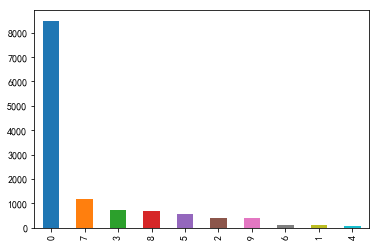

In [14]:
t= news['tag'].value_counts()
print(t)
t.plot(kind='bar')

In [15]:
#t = news['date'].str.split('-',expand=True)
# t[0].value_counts().plot(kind='bar')
# t[1].value_counts().plot(kind='bar')
#t[2].value_counts().plot(kind='bar')

In [16]:
from itertools import chain
from collections import Counter

li_2d = news['content'].tolist()
li_1d = list(chain.from_iterable(li_2d))

# 二维列表转换为一维列表

print(f'总词汇量:{len(li_1d)}')
c= Counter(li_1d)
print(f'不重复词汇量:{len(c)}')
common = c.most_common(15)
print(common)

总词汇量:5495170
不重复词汇量:178282
[('在', 65553), ('和', 57446), ('是', 40162), ('年', 35652), ('等', 34075), ('月', 28631), ('为', 28189), ('发展', 27338), ('中国', 26420), ('将', 24751), ('也', 22670), ('企业', 21861), ('与', 20519), ('对', 18379), ('中', 18174)]


<BarContainer object of 15 artists>

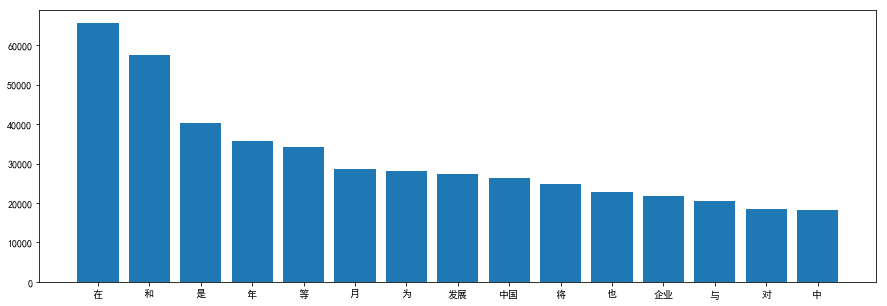

In [17]:
d = dict(common)
plt.figure(figsize=(15,5))

# plt.xticks(rotation=45)

plt.bar(d.keys(),d.values())

<BarContainer object of 15 artists>

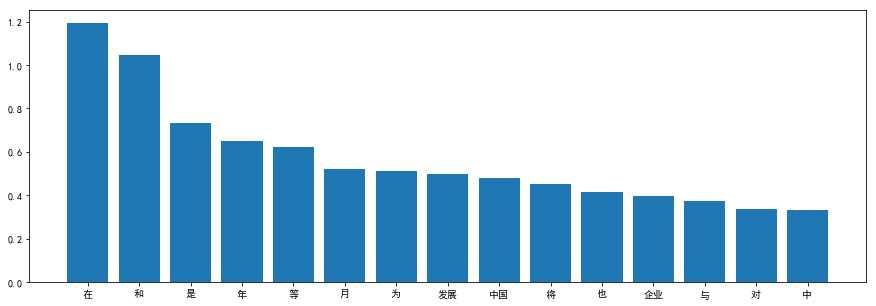

In [18]:
total = len(li_1d)
percentage = [v*100/total for v in d.values()]
plt.figure(figsize=(15,5))
plt.bar(d.keys(),percentage)

(array([1.78144e+05, 8.90000e+01, 2.50000e+01, 6.00000e+00, 6.00000e+00,
        3.00000e+00, 4.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([1.00000000e+00, 4.37113333e+03, 8.74126667e+03, 1.31114000e+04,
        1.74815333e+04, 2.18516667e+04, 2.62218000e+04, 3.05919333e+04,
        3.49620667e+04, 3.93322000e+04, 4.37023333e+04, 4.80724667e+04,
        5.24426000e+04, 5.68127333e+04, 6.11828667e+04, 6.55530000e+04]),
 <a list of 15 Patch objects>)

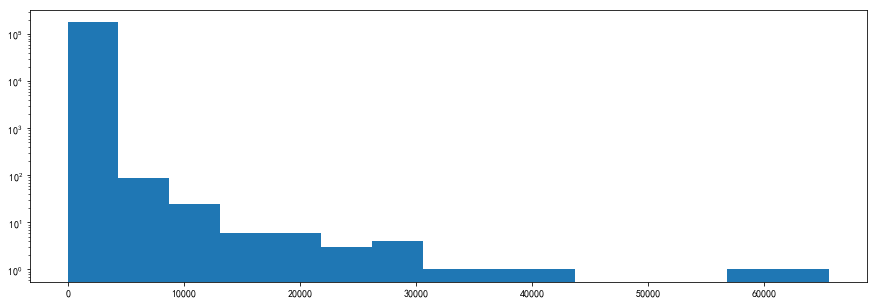

In [19]:
# 词汇频数分布直方图
plt.figure(figsize=(15,5))
t = pd.Series(c)
plt.hist(c.values(),bins=15,log=True)

# log=True：纵坐标对数显示，降低数量级相差较大产生的影响

<BarContainer object of 15 artists>

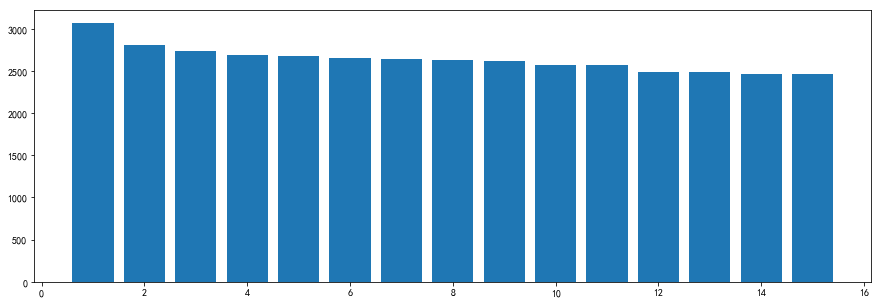

In [20]:
# 用词数量降序排列取前15条新闻
plt.figure(figsize=(15,5))
num = [len(li) for li in li_2d]
length = 15
plt.bar(range(1,length+1),sorted(num,reverse=True)[:length])

(array([2.810e+03, 5.152e+03, 2.332e+03, 1.038e+03, 6.520e+02, 3.510e+02,
        1.890e+02, 9.100e+01, 5.600e+01, 3.300e+01, 2.300e+01, 1.100e+01,
        1.000e+01, 4.000e+00, 1.000e+00]),
 array([   4.        ,  208.33333333,  412.66666667,  617.        ,
         821.33333333, 1025.66666667, 1230.        , 1434.33333333,
        1638.66666667, 1843.        , 2047.33333333, 2251.66666667,
        2456.        , 2660.33333333, 2864.66666667, 3069.        ]),
 <a list of 15 Patch objects>)

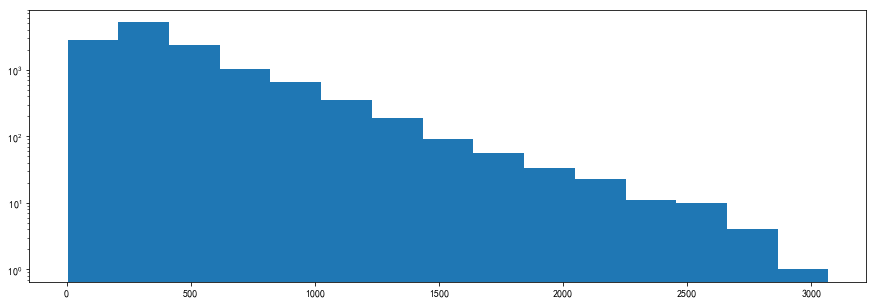

In [21]:
# 用词数量分布
plt.figure(figsize=(15,5))
plt.hist(num,bins=15,log=True)

In [22]:
from wordcloud import WordCloud

wc = WordCloud(font_path=r'C:\Windows\Fonts\simfang.ttf',width=800,height=600)
# 可以自定义背景图：WordCloud(mask=plt.imread('文件路径'))
# li_2d = news['content'].tolist()
# li_1d = list(chain.from_iterable(li_2d))
# join_words = ''.join(li_1d)
# img = wc.generate(join_words)
# generate()该方法生成的词云图非严格按照词汇出现频率，不精确
# 传进去的参数需要前面加空格处理
# plt.figure(figsize=(15,10))
# plt.imshow(img)
# plt.axis('off')
# 关闭坐标轴
# wc.to_file('wordcloud.png'）

(-0.5, 799.5, 599.5, -0.5)

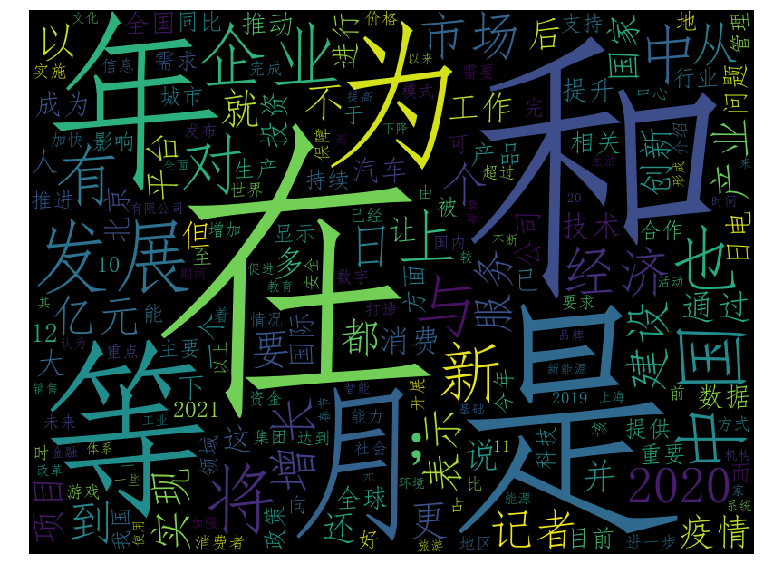

In [23]:
plt.figure(figsize=(15,10))
img = wc.generate_from_frequencies(c)
# generate_from_frequencies()该方法生成的词云图严格按照词汇出现频率
# 词汇出现频率越高，文字占比越大
# 传进去的参数为频数，前面不需要加空格处理
plt.imshow(img)
plt.axis('off')

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()
docs = [
    'Where there is a will,there is a way.',
    'There is no royal road to learning.',
]
bag = count.fit_transform(docs)
print(bag)
# 输出稀疏矩阵（0的不显示）
# 稀疏矩阵相较稠密矩阵效果更好，占用内存少
print(bag.toarray())
# 转化为稠密矩阵，均显示
print(count.get_feature_names())
# 获取特征单词
print(count.vocabulary_)
# 输出特征单词与编号映射关系

  (0, 8)	1
  (0, 5)	2
  (0, 0)	2
  (0, 9)	1
  (0, 7)	1
  (1, 5)	1
  (1, 0)	1
  (1, 2)	1
  (1, 4)	1
  (1, 3)	1
  (1, 6)	1
  (1, 1)	1
[[2 0 0 0 0 2 0 1 1 1]
 [1 1 1 1 1 1 1 0 0 0]]
['is', 'learning', 'no', 'road', 'royal', 'there', 'to', 'way', 'where', 'will']
{'where': 8, 'there': 5, 'is': 0, 'will': 9, 'way': 7, 'no': 2, 'royal': 4, 'road': 3, 'to': 6, 'learning': 1}


In [25]:
# 对训练集外的文档进行向量化
test_docs = ['While there is life there is hope.','No pain,no gain.']
t = count.transform(test_docs)
print(t.toarray())
# 训练集中未出现的词汇，不会在词袋模型转换中体现

[[2 0 0 0 0 2 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]]


In [26]:
# TF-IDF转换
from sklearn.feature_extraction.text import TfidfTransformer

count = CountVectorizer()
docs = [
    'Where there is a will,there is a way.',
    'There is no royal road to learning.',
]
bag = count.fit_transform(docs)
tfdif = TfidfTransformer()
t = tfdif.fit_transform(bag)
print(t.toarray())

[[0.53594084 0.         0.         0.         0.         0.53594084
  0.         0.37662308 0.37662308 0.37662308]
 [0.29017021 0.4078241  0.4078241  0.4078241  0.4078241  0.29017021
  0.4078241  0.         0.         0.        ]]


In [27]:
# 以上方法为词袋模型向量化（CountVectorizer（））-TF-IDF（TfidfTransformer（））调整
# 单词在文档中的权重
# TfidfVectorizer（）类集成上述两个类的功能，可直接使用

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

docs = [
    'Where there is a will,there is a way.',
    'There is no royal road to learning.',
]
tfdif = TfidfVectorizer()
t = tfdif.fit_transform(docs)
print(t.toarray())
# 可直接调用该类，更加便利

[[0.53594084 0.         0.         0.         0.         0.53594084
  0.         0.37662308 0.37662308 0.37662308]
 [0.29017021 0.4078241  0.4078241  0.4078241  0.4078241  0.29017021
  0.4078241  0.         0.         0.        ]]


In [29]:
# 构建训练与测试集
def join(text_list):
    return " ".join(text_list)

news['content'] = news['content'].apply(join)
news.sample(5)

,content,channelName,title,tag
8833,人民网 北京 12 月 25 日电 记者 张烁 日前 以 十四五 时期 中外合作 办学 高质...,教育,林金辉：推动中外合作办学走深走实,2
13711,客户端 北京 月 日电 记者 袁秀 月 春节假期 过去 一周 多 你好 李焕英 单日 票房 ...,娱乐,《你好，李焕英》里，藏着几代厂矿子弟的乡愁,8
6511,上海 月 日电 记者 许婧 记者 日 从 上海市 市场 监督 管理局 获悉 设立 注销 等 ...,财经,上海创新“互联网+窗口”服务模式 13项业务实现跨省通办,0
10020,西宁 12 月 10 日电 孙睿 青油 新 记者 10 日 从 中国石油天然气集团公司 青海...,科技,青海油田储层改造收获效益油,3
3399,京沪 深 三城 整顿 住房 租赁 市场 租赁 住房 将成 可 长期 接受 住房 消费 方式 ...,财经,京沪深三城整顿住房租赁市场 加快完善长租房政策,0


In [30]:
news['content']

0        北京 月 31 日电 记者 王恩博 中国 金融业 开放 程度 不断 加深 越来越 多 外资 ...
1        北京 月 31 日电 记者 王恩博 记者 月 31 日 从 中国 银 保监会 获悉 官方 将...
2        天津 月 31 日电 记者 张道 正 京津冀 交通 一体化 重点项目 又 有 新进展 31 ...
3        中 新 经纬 客户端 月 31 日电 周三 A股 三大 指数 小幅 低开 能源 设备 家用电...
4        华盛顿 月 30 日电 记者 沙晗 汀 国际货币基金组织 IMF 总裁 格奥尔基 耶娃 当地...
5        长沙 月 31 日电 付敬懿 总部 位于 湖南 长沙 中国 工程机械 龙头企业 中联重科 3...
6        机车 汽笛 一声 长鸣 一列 中欧 班列 从 江西 南昌 向塘 国际 陆港 新城 横岗 站 ...
7        中国 进口 增强 世界 经济 动能 新知 新觉 进口 是 联通 国内 国际 两个 市场 两种...
8        春季 出游 热潮 到来 预计 今年 清明节 出游 人次 将 达到 亿人次 在 继续 做好 疫...
9        翻开 中国 地图 北部湾 西南地区 最 便捷 出海口 清晰可见 北海 钦州 防城港 座 港口...
10       剧本 杀 是 俘获 年轻人 2016 年 悄然 出现 剧本 杀 游戏 在 短短 几年 间 俘...
11       坚持 发展 和 规范 齐头并进 平台 经济 有 规矩 走 得 远 网上 中国 网购 打车 点...
12       后 疫情 时代 方便 食品 成为 三好生 潜力股 电视剧 都 挺 好 已经 热播 两年 多 ...
13       深圳 向 炒 房 说 不 本报记者 杨阳腾 曾 因万人 摇号 打 新 热潮 而 屡 上 热 ...
14       我国 有 能力 应对 国际 粮价 上涨 挑战 本报记者 刘慧 去年 以来 受新冠 肺炎 疫情...
15       贵阳 月 30 日电 周燕玲 蒲 文思 月 30 日晚 贵州 茅台酒 股份 有限公司 简称 ...
16       中 新 经纬 客户端 月 31 日电 冯方 今日 31 日 24 时 国内 成品油 新一轮 .

In [31]:
from sklearn.model_selection import train_test_split

X = news['content']
y = news['tag']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
print('训练集样本数：',y_train.shape[0],'测试集样本数：',y_test.shape[0])

训练集样本数： 9564 测试集样本数： 3189


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
# TfidfVectorizer（）对X向量化操作
vec = TfidfVectorizer(ngram_range=(1,2))
# ngram_range=(1,2)对切分的一维/二维元组再进行向量化，减少语句本来不同
# ——但切分出的单词相同带来的误差
X_train_tran = vec.fit_transform(X_train)
X_test_tran = vec.transform(X_test)
display(X_train_tran,X_test_tran)

<9564x1897961 sparse matrix of type '<class 'numpy.float64'>'
	with 4863837 stored elements in Compressed Sparse Row format>

<3189x1897961 sparse matrix of type '<class 'numpy.float64'>'
	with 1158808 stored elements in Compressed Sparse Row format>

In [33]:
# 词袋模型向量化后会产生过多特征，用方差分析进行特征选择，选出与目标相对
# 变量最相关的20000个特征
from sklearn.feature_selection import f_classif

f_classif(X_train_tran,y_train)

(array([8.45380113e+01, 1.48207706e+00, 3.90391744e+01, ...,
        1.45339398e+00, 5.52974921e-02, 2.48422404e+00]),
 array([7.72042715e-152, 1.48054877e-001, 6.59993475e-069, ...,
        1.59180177e-001, 9.99970125e-001, 7.86145160e-003]))

In [1]:
from sklearn.feature_selection import SelectKBest

X_train_tran = X_train_tran.astype(np.float32)
X_test_tran = X_test_tran.astype(np.float32)
selector = SelectKBest(f_classif,k=min(20000,X_train_tran.shape[1]))
selector.fit(X_train_tran,y_train)
print(selector.get_support(True))
X_train_tran = selector.transform(X_train_tran)
X_test_tran = selector.transform(X_test_tran)
print(X_train_tran.shape,X_test_tran.shape)

NameError: name 'X_train_tran' is not defined

# 开始机器学习

In [35]:
# 逻辑回归
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param = [{'penalty':['l1','l2'], 'C':[0.1,1,10],
        'solver':['liblinear']},
         {'penalty':['elasticnet'],'C':[0.1,1,10],
        'solver':['saga'],'l1_ratio':[0.5]}
        ]



#print(classification_report(y_test,y_hat))

In [36]:
from sklearn import linear_model
model_softmax_regression = linear_model.LogisticRegression(solver='lbfgs',multi_class="multinomial",max_iter=10)
#这俩参数啥意思？
model_softmax_regression.fit(X_train_tran, y_train)
y_predict = model_softmax_regression.predict(X_test_tran)
accurcy = np.sum(y_predict == y_test) / len(y_test)
print(accurcy)

0.7804954531201004


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [37]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      2116
           1       0.00      0.00      0.00        27
           2       1.00      0.03      0.06        94
           3       0.00      0.00      0.00       192
           4       0.00      0.00      0.00        18
           5       0.75      0.09      0.16       137
           6       0.00      0.00      0.00        25
           7       0.99      0.85      0.91       310
           8       0.93      0.22      0.36       170
           9       1.00      0.66      0.80       100

    accuracy                           0.78      3189
   macro avg       0.54      0.28      0.31      3189
weighted avg       0.74      0.78      0.71      3189



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
'''import joblib
joblib.dump(model_softmax_regression,'softmax_regression.pkl')   #保存最好模型'''

['softmax_regression.pkl']

In [39]:
import sklearn
sklearn.__version__

'0.24.2'

In [47]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

param = {'n_neighbors':[5,7],
        'weights':['uniform','distance'],
        'p':[2]
        }
gs = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=param,
                 cv=2, n_jobs=-1, verbose=10)
gs.fit(X_train_tran,y_train)
print(gs.best_params_)
y_hat = gs.best_estimator_.predict(X_test_tran)
print(classification_report(y_test,y_hat))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2116
           1       1.00      0.07      0.14        27
           2       0.89      0.66      0.76        94
           3       0.72      0.39      0.51       192
           4       0.00      0.00      0.00        18
           5       0.84      0.55      0.67       137
           6       0.16      0.12      0.14        25
           7       0.99      0.85      0.92       310
           8       0.94      0.67      0.78       170
           9       0.88      0.84      0.86       100

    accuracy                           0.86      3189
   macro avg       0.73      0.51      0.57      3189
weighted avg       0.85      0.86      0.84      3189



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
'''KNN = joblib.load('C:\\Users\\lyw10\\Desktop\\learning\\大二下\\软件杯比赛\\model\\KNN_5.pkl')'''

In [51]:
'''y_hat = KNN.predict(X_test_tran)
y_hat'''

array([6, 0, 0, ..., 0, 7, 0], dtype=int64)

In [48]:
gs.best_estimator_

KNeighborsClassifier(weights='distance')

In [41]:
'''import joblib
joblib.dump(gs.best_estimator_,'./model/KNN_5.pkl')  '''

['./model/KNN_5.pkl']

In [42]:
# 决策树
from sklearn.tree import DecisionTreeClassifier

param = {'criterion':['gini','entropy'],
        'max_depth':[10,15]
        }
gs = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param,
                 cv=2, n_jobs=-1, verbose=10)
gs.fit(X_train_tran,y_train)
print(gs.best_params_)
y_hat = gs.best_estimator_.predict(X_test_tran)
print(classification_report(y_test,y_hat))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
{'criterion': 'gini', 'max_depth': 15}
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2116
           1       0.86      0.22      0.35        27
           2       0.99      0.95      0.97        94
           3       0.61      0.46      0.52       192
           4       0.00      0.00      0.00        18
           5       0.71      0.58      0.64       137
           6       0.90      0.76      0.83        25
           7       0.98      0.92      0.95       310
           8       0.84      0.76      0.80       170
           9       0.99      0.96      0.97       100

    accuracy                           0.88      3189
   macro avg       0.78      0.66      0.69      3189
weighted avg       0.87      0.88      0.87      3189



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
'''import joblib
joblib.dump(gs.best_estimator_,'./model/dicisionTree.pkl')'''

['./model/dicisionTree.pkl']

In [44]:
from sklearn.neural_network import MLPClassifier

param = {'hidden_layer_sizes':[(8,),(4,)],
        }
gs = GridSearchCV(estimator=MLPClassifier(),param_grid=param,
                 cv=2, n_jobs=-1, verbose=10)
gs.fit(X_train_tran,y_train)
print(gs.best_params_)
y_hat = gs.best_estimator_.predict(X_test_tran)
print(classification_report(y_test,y_hat))

Fitting 2 folds for each of 2 candidates, totalling 4 fits
{'hidden_layer_sizes': (8,)}
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2116
           1       0.86      0.22      0.35        27
           2       0.92      0.97      0.94        94
           3       0.67      0.60      0.63       192
           4       0.00      0.00      0.00        18
           5       0.84      0.82      0.83       137
           6       1.00      0.92      0.96        25
           7       0.99      0.99      0.99       310
           8       0.90      0.92      0.91       170
           9       1.00      1.00      1.00       100

    accuracy                           0.92      3189
   macro avg       0.81      0.74      0.76      3189
weighted avg       0.91      0.92      0.91      3189



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precisio

In [45]:
'''import joblib
joblib.dump(gs.best_estimator_,'./model/MLPClassifier.pkl')'''

['./model/MLPClassifier.pkl']

In [46]:
# 朴素贝叶斯
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import classification_report

steps = [('dense',FunctionTransformer(func=lambda X: X.toarray(),accept_sparse=True)),
       ('model',None)
       ]
pipe = Pipeline(steps=steps)
param = {'model':[GaussianNB(),BernoulliNB(),MultinomialNB(),ComplementNB()]
        }
gs = GridSearchCV(estimator=pipe,param_grid=param,scoring="accuracy",
                 cv=2, n_jobs=2, verbose=10)
gs.fit(X_train_tran,y_train)
print(gs.best_params_)
y_hat = gs.best_estimator_.predict(X_test_tran)
print(classification_report(y_test,y_hat))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
{'model': ComplementNB()}
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2116
           1       0.00      0.00      0.00        27
           2       0.93      0.54      0.68        94
           3       0.76      0.16      0.27       192
           4       0.92      0.61      0.73        18
           5       1.00      0.26      0.42       137
           6       1.00      0.16      0.28        25
           7       0.99      0.98      0.98       310
           8       0.93      0.92      0.92       170
           9       0.84      0.98      0.91       100

    accuracy                           0.87      3189
   macro avg       0.82      0.56      0.61      3189
weighted avg       0.87      0.87      0.84      3189



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import joblib
joblib.dump(gs.best_estimator_,'./model/ComplementNB.pkl')